In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/hands/Downloads/universal_top_spotify_songs.csv")
df.shape

(72958, 25)

In [5]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,NaN,2023-11-06,73,True,...,11,-4.185,1,0.0440,0.3120,0.0,0.0797,0.872,124.987,4
1,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,Jung Kook,2,0,48,NaN,2023-11-06,83,False,...,2,-4.389,0,0.0955,0.0447,0.0,0.3390,0.816,106.017,4
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,4,NaN,2023-11-06,99,True,...,6,-3.180,0,0.0319,0.2560,0.0,0.1140,0.844,111.018,1
3,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,4,0,2,NaN,2023-11-06,99,False,...,5,-8.720,1,0.0285,0.8270,0.0,0.1380,0.524,98.224,4
4,1Iq8oo9XkmmvCQiGOfORiz,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,5,0,-4,NaN,2023-11-06,92,False,...,0,-7.346,1,0.0360,0.0504,0.0,0.1270,0.176,100.012,4


# Exploratory Data Analysis-EDA

In [6]:
df.isnull().sum()

spotify_id               0
name                     1
artists                  1
daily_rank               0
daily_movement           0
weekly_movement          0
country               1002
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name               1
album_release_date       1
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

# Missing Values

In [7]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

country 0.0137  % missing values


# Find the relationship between missing values and popularity

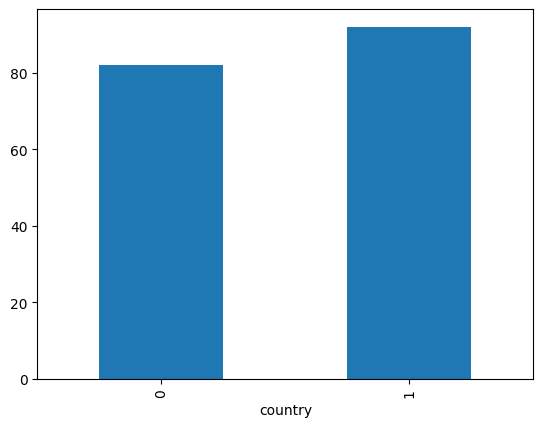

In [8]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean popularity where the information is missing or present
    data.groupby(feature)['popularity'].median().plot.bar()

# Numerical Variables

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  18


,daily_rank,daily_movement,weekly_movement,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,0,49,73,True,183550,0.790,0.831,11,-4.185,1,0.0440,0.3120,0.0,0.0797,0.872,124.987,4
1,2,0,48,83,False,206019,0.711,0.809,2,-4.389,0,0.0955,0.0447,0.0,0.3390,0.816,106.017,4
2,3,0,4,99,True,131872,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.0,0.1140,0.844,111.018,1
3,4,0,2,99,False,184061,0.537,0.421,5,-8.720,1,0.0285,0.8270,0.0,0.1380,0.524,98.224,4
4,5,0,-4,92,False,229477,0.596,0.658,0,-7.346,1,0.0360,0.0504,0.0,0.1270,0.176,100.012,4


In [10]:
# list of variables that contain All movement information
mov_feature = [feature for feature in numerical_features if 'week' in feature or 'daily' in feature]

mov_feature

['daily_rank', 'daily_movement', 'weekly_movement']

In [13]:
for feature in mov_feature:
    print(feature, df[feature].unique())

daily_rank [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
daily_movement [  0   2  -1   1  -3   7  -2   3   5  11   9  12  -8  -4 -13   4   6 -12
 -18 -16  -9  10   8 -10 -15  -6  -5 -17  -7 -24 -11 -14 -32 -20  13 -27
 -22  16  14  17 -26  22  20  15  24 -25  42 -23  21  18 -19 -28 -21  49
  48  27  34  32  26  23  36  41  39  38  37  47  35  33  44  31  29  45
  43  40  19  28  25  46  30 -29 -41 -34 -40 -31 -30 -33 -37 -36 -46 -38]
weekly_movement [ 49  48   4   2  -4   6   3  26  10  16  37  -9  14  17   8 -18  18  15
 -21  24  19  22  12  13 -34  11   1   9   7   5   0  -3  38  21  -2  47
  42  41  40  39  -7  35  -6 -12  -5 -14 -10 -13  -8  -1 -11  43  23  20
  44  31 -15  29  25 -16 -29 -32 -38  45  34 -20 -25 -28 -46  36  32 -17
  28 -26 -19 -37  30 -36 -22  46 -45 -39  33  27 -24 -23 -40 -30 -31 -35
 -27 -42 -43 -33]


In [14]:
mov_feature

['daily_rank', 'daily_movement', 'weekly_movement']

<AxesSubplot: xlabel='daily_rank'>

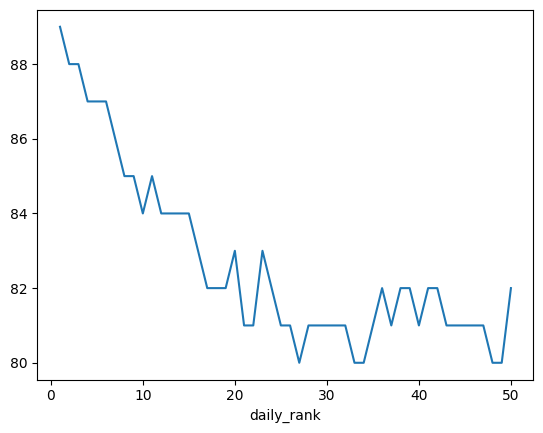

In [15]:
## Lets analyze the Temporal Daily_rank Variables
## We will check whether there is a relation between daily_rank and the popularity

df.groupby('daily_rank')['popularity'].median().plot()

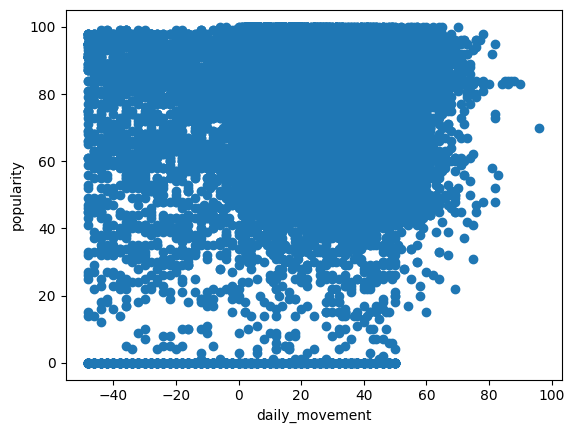

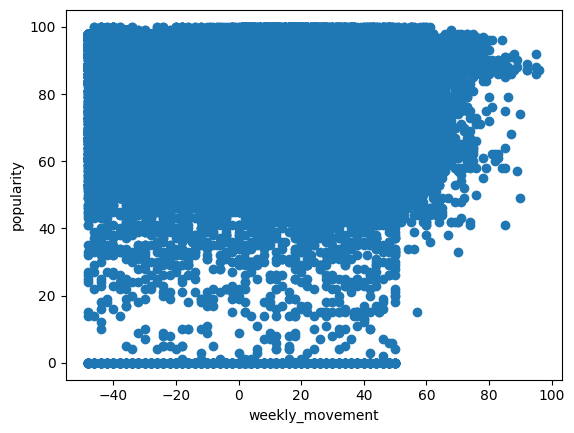

In [17]:
## Here we will compare the difference between All movements with popularity

for feature in mov_feature:
    if feature!='daily_rank':
        data=df.copy()
        ## We will capture the difference between movement variable and popularity
        data[feature]=data['daily_rank']-data[feature]

        plt.scatter(data[feature],data['popularity'])
        plt.xlabel(feature)
        plt.ylabel('popularity')
        plt.show()

# Discrete Variables

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in mov_feature+['spotify_id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [19]:
discrete_feature

['is_explicit', 'key', 'mode', 'time_signature']

In [20]:
df[discrete_feature].head()

,is_explicit,key,mode,time_signature
0,True,11,1,4
1,False,2,0,4
2,True,6,0,1
3,False,5,1,4
4,False,0,1,4


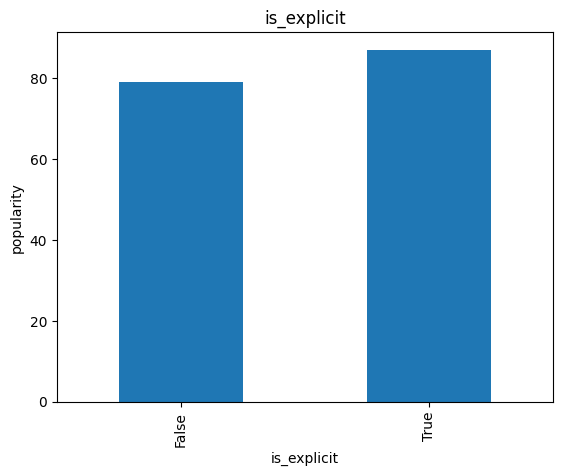

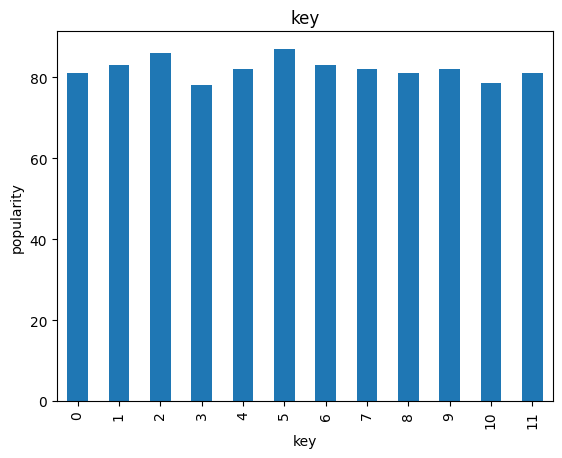

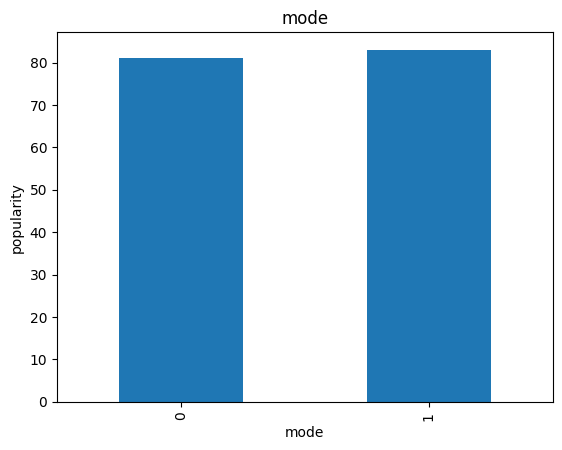

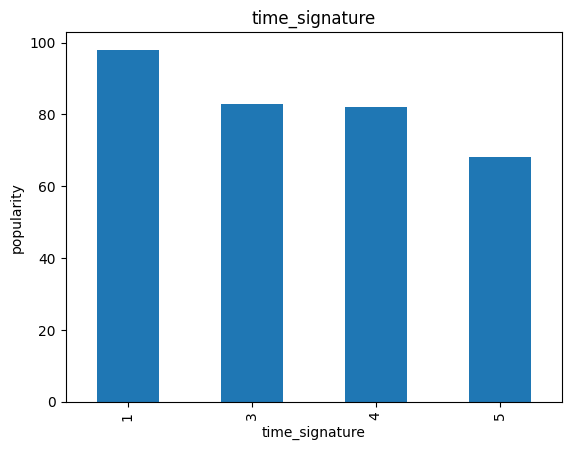

In [21]:
## Lets Find the realtionship between them and popularity

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['popularity'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('popularity')
    plt.title(feature)
    plt.show()

# Continous variables

In [22]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_feature+mov_feature+['spotify_id']]
print("continous Variables Count: {}".format(len(continous_feature)))

continous Variables Count: 11


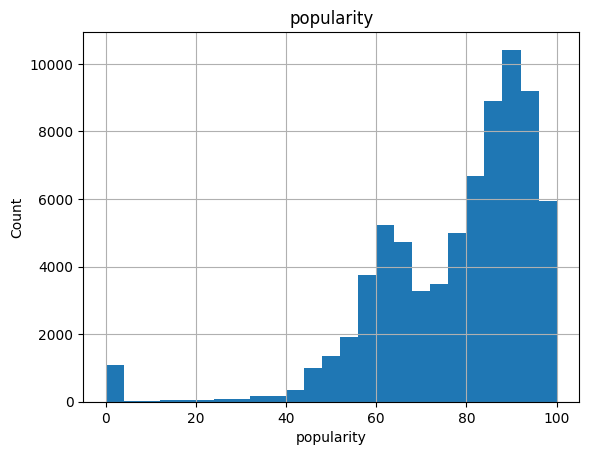

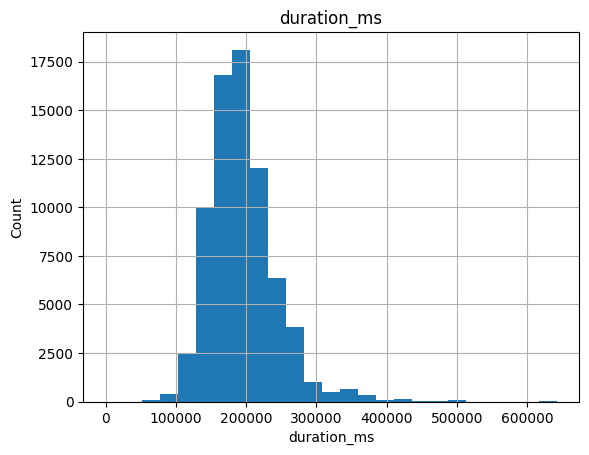

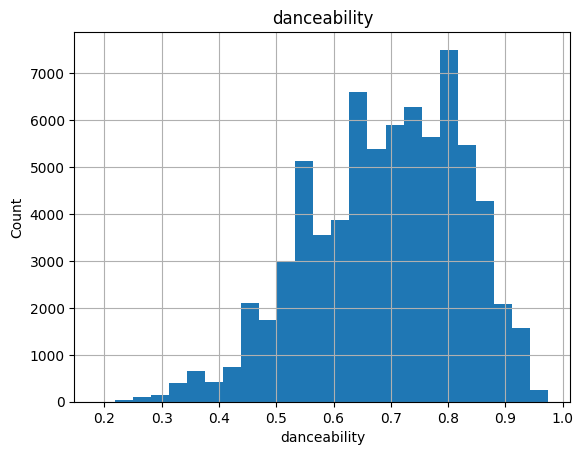

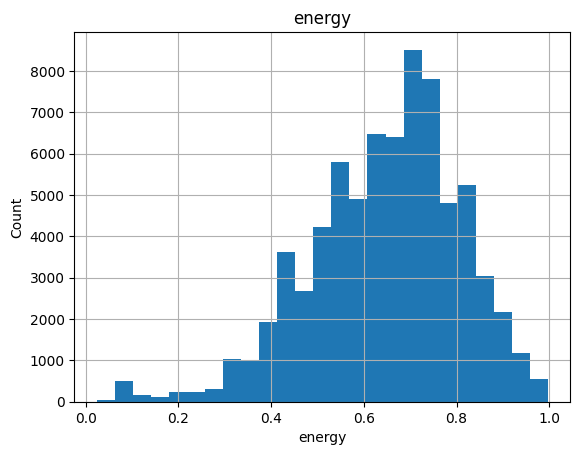

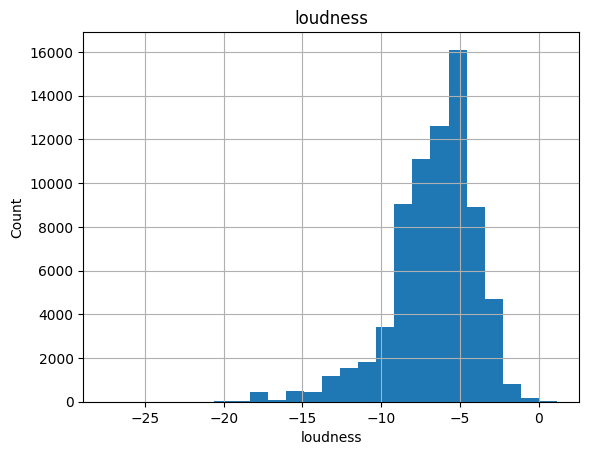

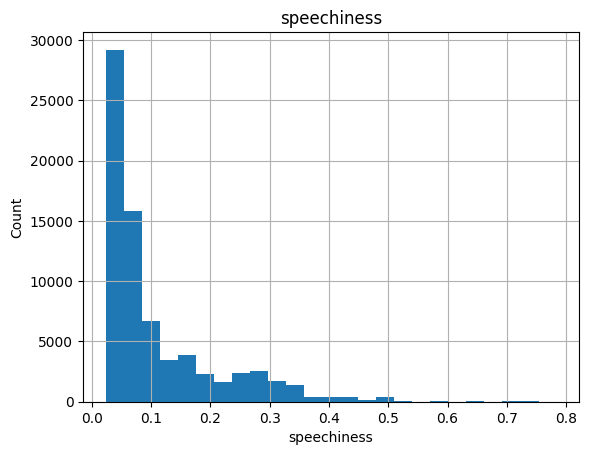

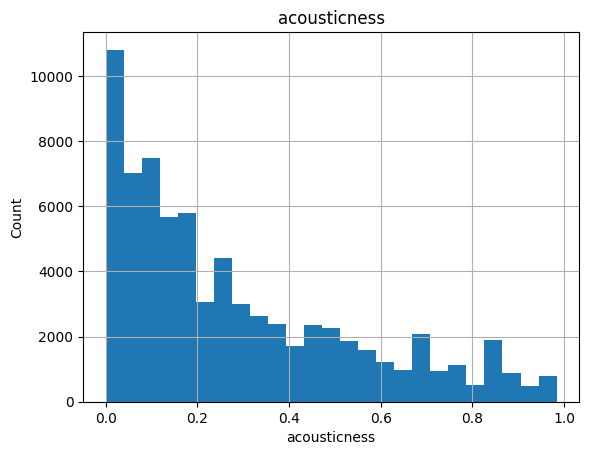

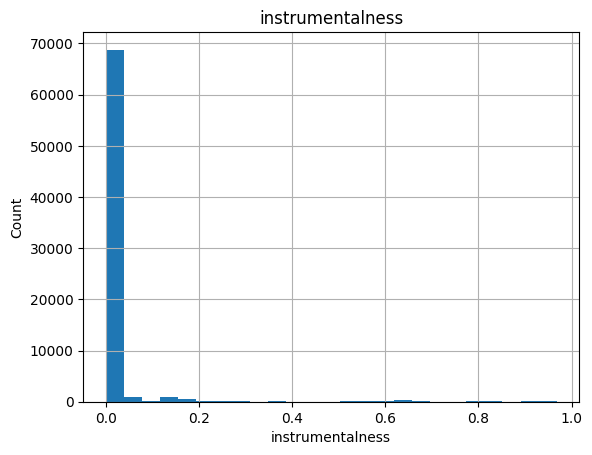

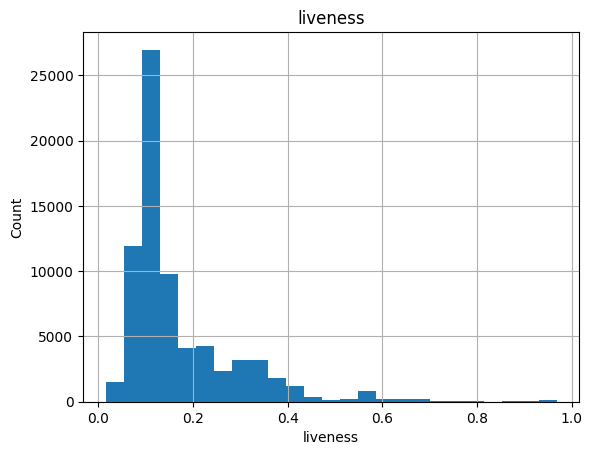

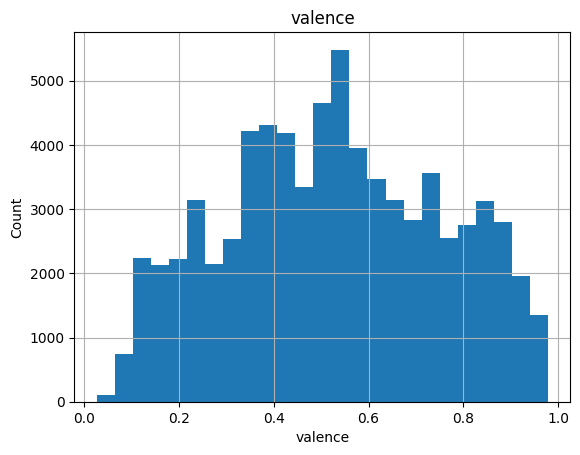

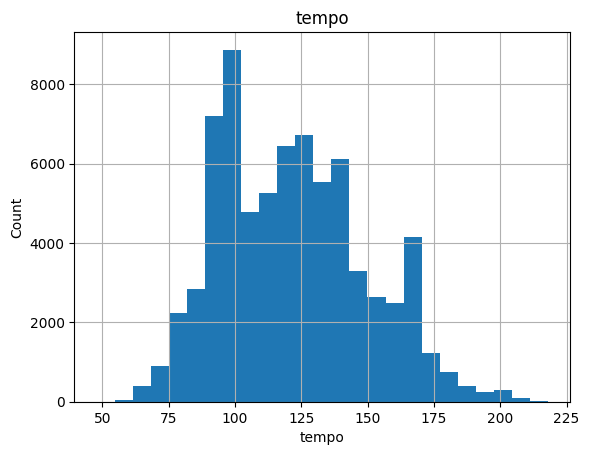

In [23]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


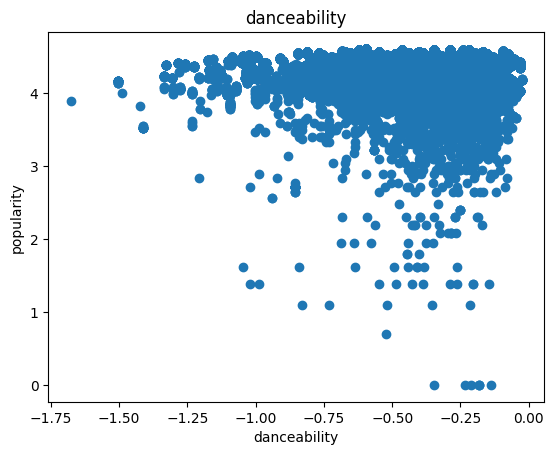

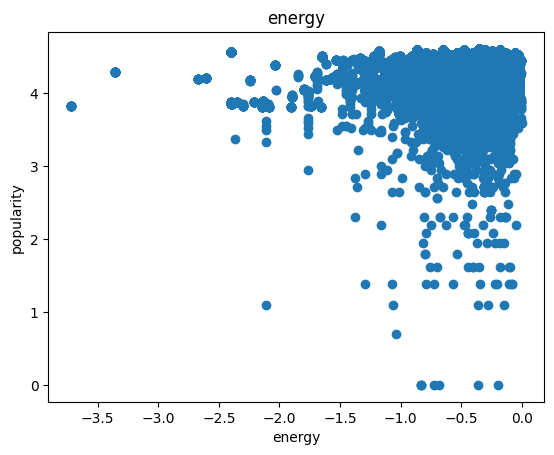

C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


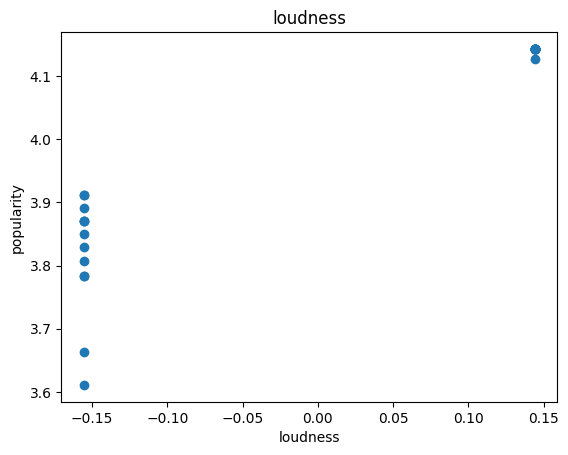

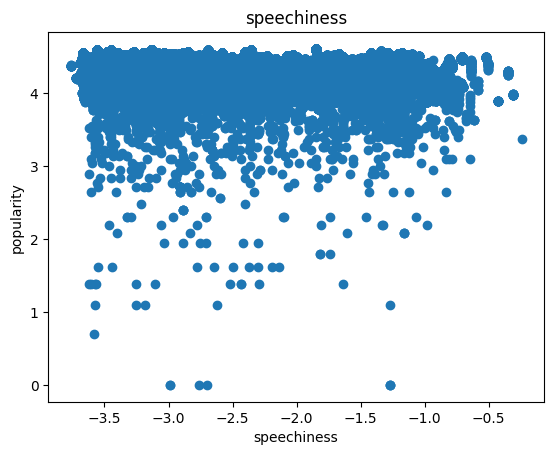

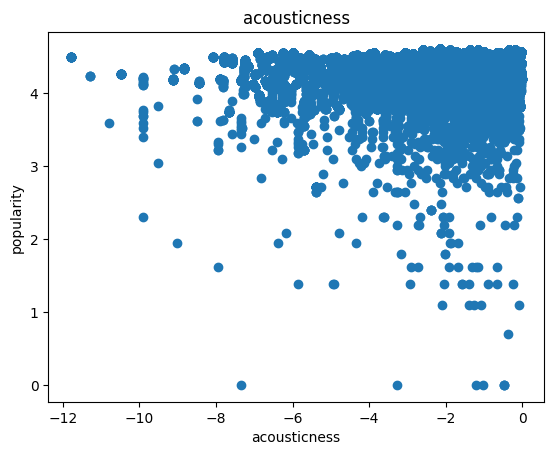

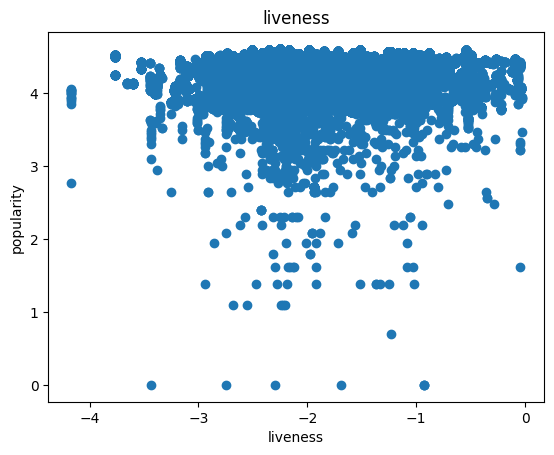

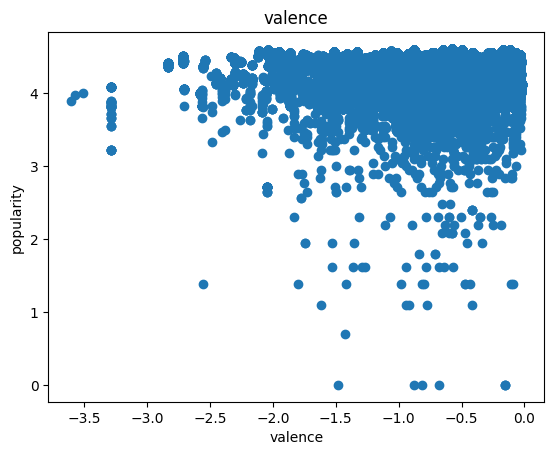

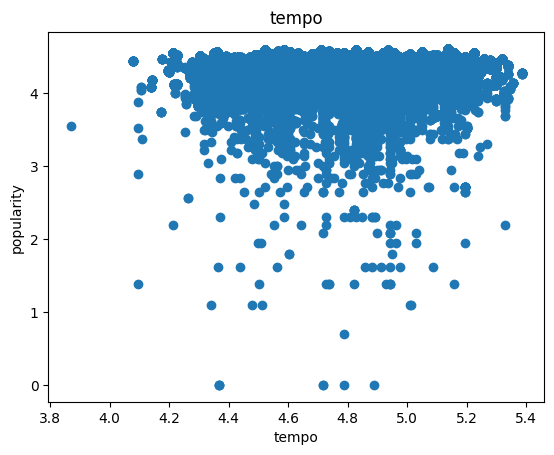

In [24]:
## We will be using logarithmic transformation


for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['popularity']=np.log(data['popularity'])
        plt.scatter(data[feature],data['popularity'])
        plt.xlabel(feature)
        plt.ylabel('popularity')
        plt.title(feature)
        plt.show()

# outliers

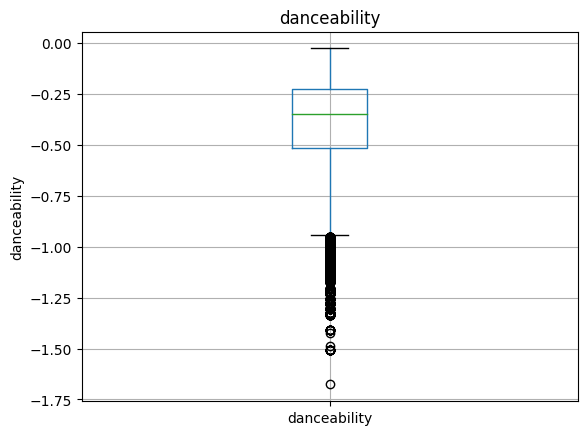

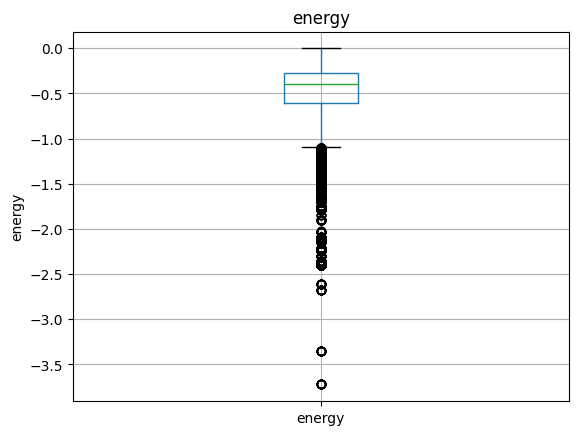

C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


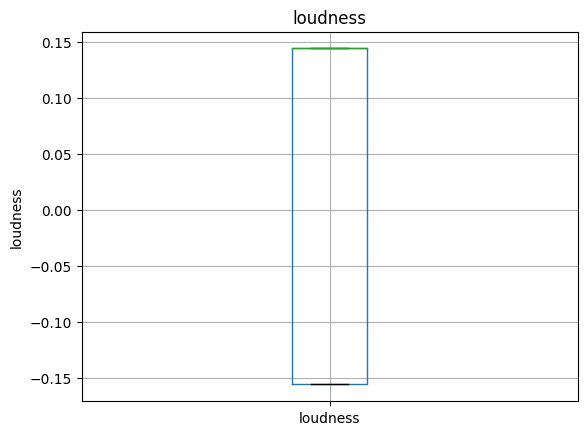

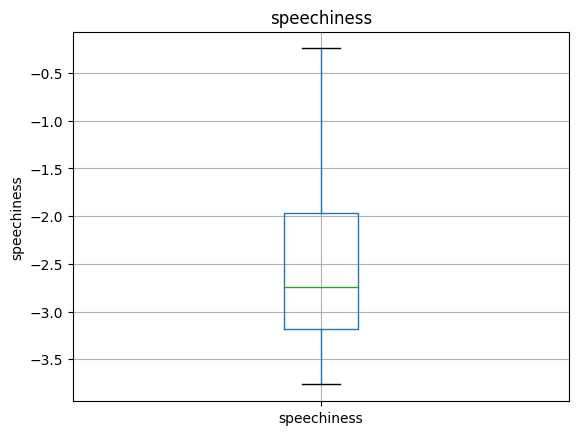

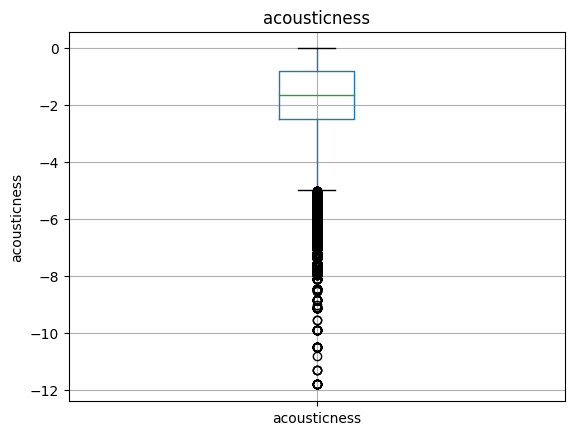

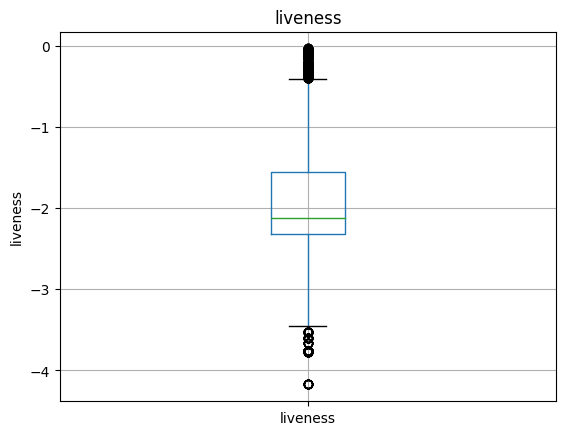

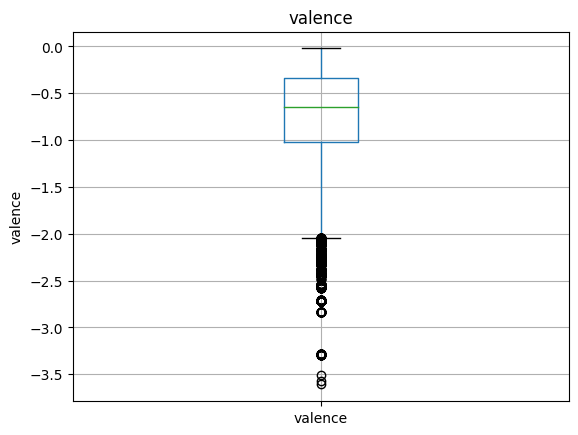

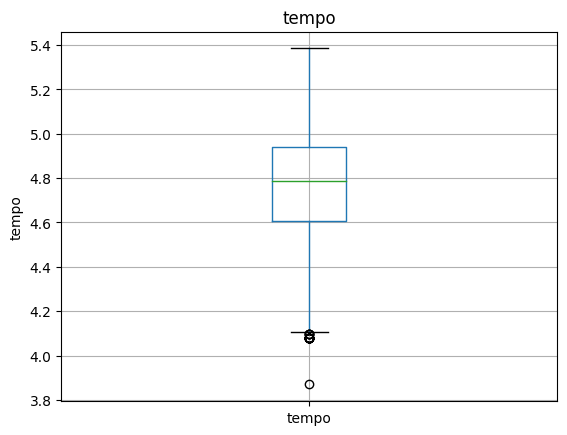

In [25]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical variables

In [26]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['spotify_id',
 'name',
 'artists',
 'country',
 'snapshot_date',
 'album_name',
 'album_release_date']

In [27]:
df[categorical_features].head()

,spotify_id,name,artists,country,snapshot_date,album_name,album_release_date
0,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",NaN,2023-11-06,GOLDEN,2023-11-03
1,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,Jung Kook,NaN,2023-11-06,GOLDEN,2023-11-03
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,NaN,2023-11-06,greedy,2023-09-15
3,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,NaN,2023-11-06,Si No Estás,2022-09-23
4,1Iq8oo9XkmmvCQiGOfORiz,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,NaN,2023-11-06,1989 (Taylor's Version),2023-10-26


In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is spotify_id and number of categories are 2752
The feature is name and number of categories are 2689
The feature is artists and number of categories are 2013
The feature is country and number of categories are 73
The feature is snapshot_date and number of categories are 20
The feature is album_name and number of categories are 2148
The feature is album_release_date and number of categories are 719


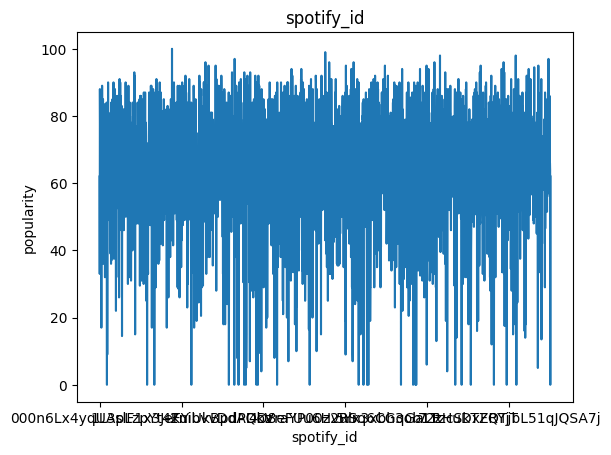

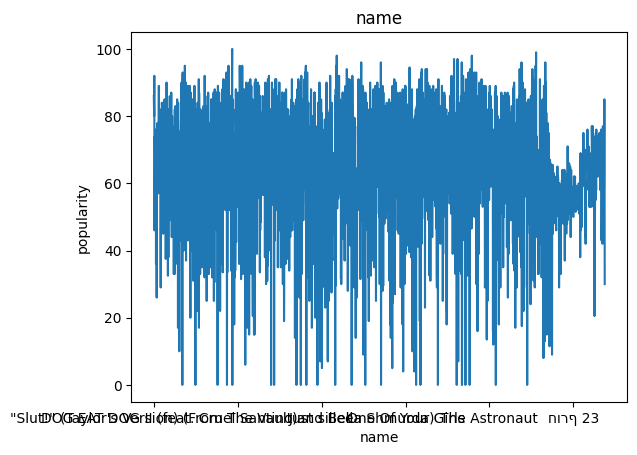

C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hands\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19971 (\N{CJK UNIFIED IDEOGRAPH-4E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


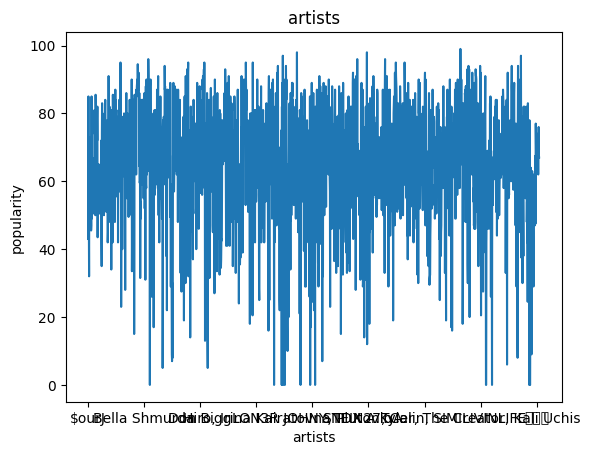

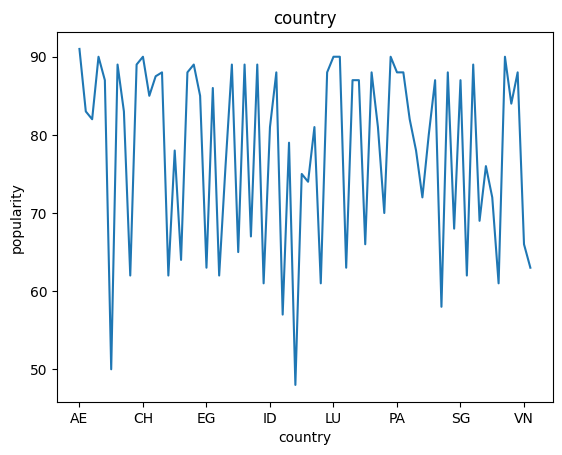

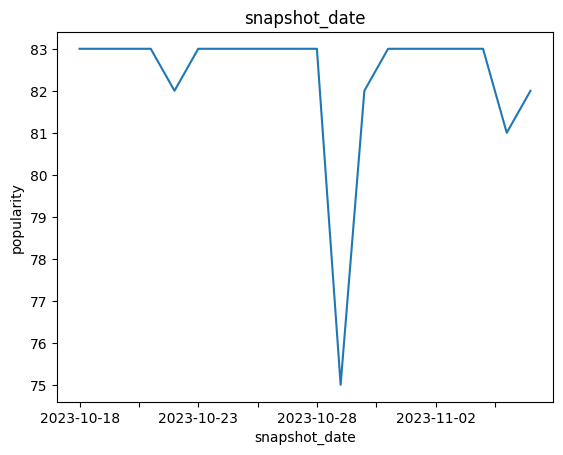

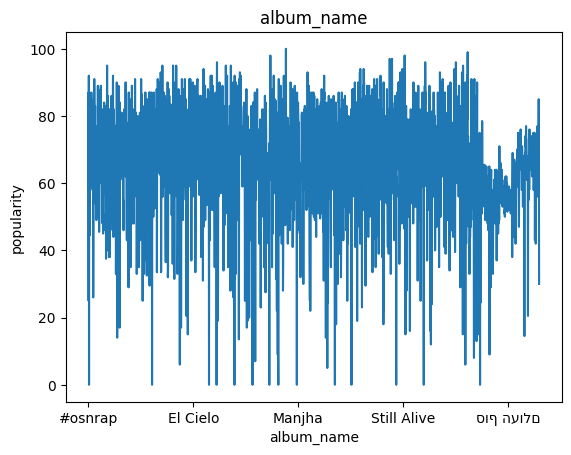

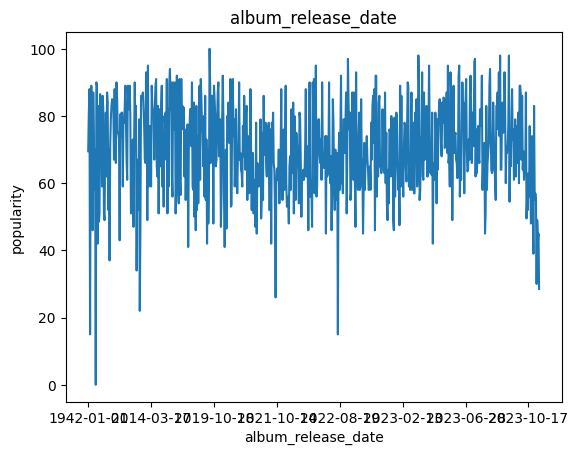

In [29]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['popularity'].median().plot.line()
    plt.xlabel(feature)
    plt.ylabel('popularity')
    plt.title(feature)
    plt.show()

# Feature Engineering

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['popularity'],test_size=0.1,random_state=0)

In [31]:
X_train.shape, X_test.shape

((65662, 25), (7296, 25))

# Missing Values

In [32]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

country: 0.0137% missing values


In [33]:
## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(df,features_nan)

dataset[features_nan].isnull().sum()

country    0
dtype: int64

In [34]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,NaN,2023-11-06,73,True,...,11,-4.185,1,0.0440,0.3120,0.0,0.0797,0.872,124.987,4
1,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,Jung Kook,2,0,48,NaN,2023-11-06,83,False,...,2,-4.389,0,0.0955,0.0447,0.0,0.3390,0.816,106.017,4
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,4,NaN,2023-11-06,99,True,...,6,-3.180,0,0.0319,0.2560,0.0,0.1140,0.844,111.018,1
3,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,4,0,2,NaN,2023-11-06,99,False,...,5,-8.720,1,0.0285,0.8270,0.0,0.1380,0.524,98.224,4
4,1Iq8oo9XkmmvCQiGOfORiz,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,5,0,-4,NaN,2023-11-06,92,False,...,0,-7.346,1,0.0360,0.0504,0.0,0.1270,0.176,100.012,4
